In [9]:
from numpy import sqrt, newaxis
from numpy.fft import irfft, rfftfreq
from numpy.random import normal
from numpy.random import seed

def powernoise(exponent,size,fmin=0):
    
    # Make sure size is a list so we can iterate it and assign to it.
    try:
        size = list(size)
    except TypeError:
        size = [size]
        
    # The number of samples in each time series
    samples = size[-1]
    
    # Calculate Frequencies (we asume a sample rate of one)
    # Use fft functions for real output (-> hermitian spectrum)
    f = rfftfreq(samples)
    
    # Build scaling factors for all frequencies
    s_scale = f
    fmin = max(fmin, 1./samples) # Low frequency cutoff
    ix   = sum(s_scale < fmin)   # Index of the cutoff
    if ix and ix < len(s_scale):
        s_scale[:ix] = s_scale[ix]
    s_scale = s_scale**(-exponent/2.)
    
    # Calculate theoretical output standard deviation from scaling
    w      = s_scale[1:].copy()
    w[-1] *= (1 + (samples % 2)) / 2. # correct f = +-0.5
    sigma = 2 * sqrt(sum(w**2)) / samples
    
    # Adjust size to generate one Fourier component per frequency
    size[-1] = len(f)

    # Add empty dimension(s) to broadcast s_scale along last
    # dimension of generated random power + phase (below)
    dims_to_add = len(size) - 1
    s_scale     = s_scale[(newaxis,) * dims_to_add + (Ellipsis,)]
    
    # Generate scaled random power + phase
    seed(1)
    sr = normal(scale=s_scale, size=size)
    si = normal(scale=s_scale, size=size)
    
    #print (sr)
    #print (si)
    
    
    # If the signal length is even, frequencies +/- 0.5 are equal
    # so the coefficient must be real.
    if not (samples % 2): si[...,-1] = 0
    
    # Regardless of signal length, the DC component must be real
    si[...,0] = 0
    
    # Combine power + corrected phase to Fourier components
    s  = sr + 1J * si
    
    # Transform to real time series & scale to unit variance
    y = irfft(s, n=samples, axis=-1) / sigma
    
    return y

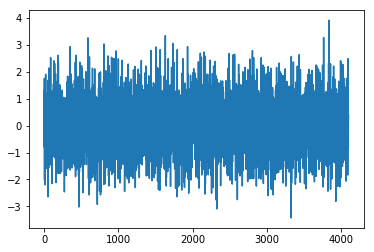

In [30]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import seaborn as sns


#Pink Noise
lista = powernoise(0,4096)
#Red Noise
#lista = powernoise(2,1000)

#lista = lista / 3.662394

plt.plot(lista)

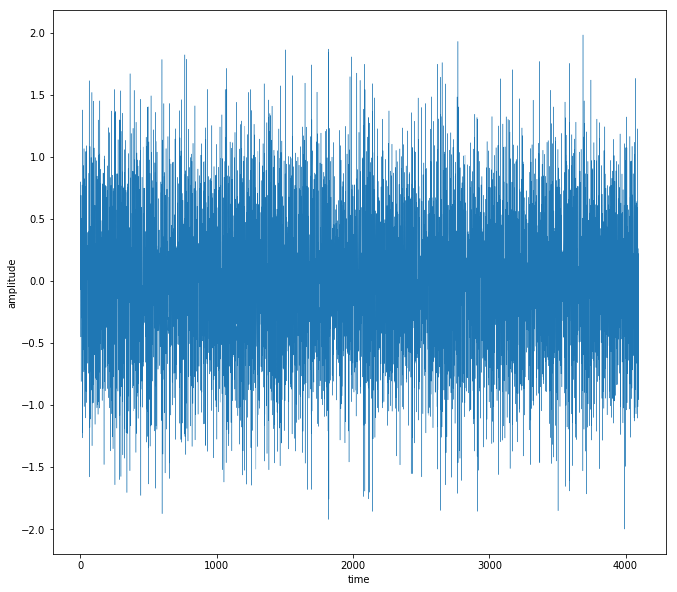

In [38]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/helvecio/whiteNoise.csv', header=None)
df2 = pd.read_csv('/home/helvecio/pinkNoise.csv', header=None)


fig = plt.figure(figsize = (11,10))
ax  = fig.add_subplot(111)

#ax.plot(df, linewidth=0.2)
ax.plot(df2, linewidth=0.4)

thinkplot.config(xlabel='time',
                 ylabel='amplitude',
                 #ylim=[-0.5, 0.5],
                 legend=False)
plt.show()

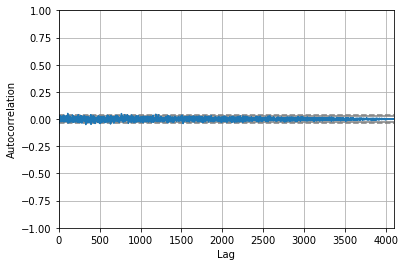

In [41]:
autocorrelation_plot(lista)

/home/helvecio/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


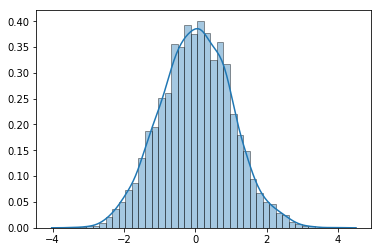

In [40]:
sns.distplot(lista, bins=40, hist_kws={'edgecolor':'black'})

count    4096.000000
mean        0.017950
std         0.997047
min        -3.426406
25%        -0.654748
50%         0.029125
75%         0.702619
max         3.905804
dtype: float64


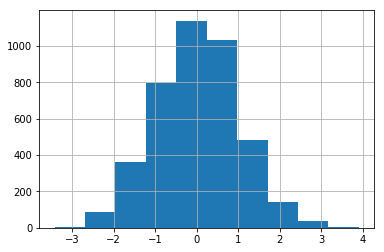

In [39]:
from pandas import Series

lista = Series(lista)

lista.hist()
print(lista.describe())